🔷 **Classifier les usages énergétiques selon les profils utilisateurs**  

### 🎯 Objectif
Dans le cadre de l’optimisation énergétique du campus de l’IIIT Delhi, l’objectif est de **classifier les usages énergétiques** des bâtiments en fonction des différents profils d’occupation :  
- Étudiants  
- Personnel administratif et technique  
- Week-ends et périodes de faible activité  
- Événements spéciaux  

Cette classification permettra d’identifier les comportements de consommation propres à chaque profil et de mettre en place des stratégies ciblées de réduction et d’optimisation énergétique.


In [1]:
import pandas as pd

# ✅ Lecture directe sans sous-chemin car le fichier est dans le même dossier que le notebook
df2 = pd.read_csv("df_final_project3.csv")

# Affichage des colonnes et des premières lignes
print(df2.columns.tolist())


['timestamp', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB', 'working_day', 'activity', 'hour', 'dayofweek', 'month', 'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh', 'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh', 'CO2_total', 'temperature', 'humidity']


In [2]:
df2['activity'] = df2['activity'].map({'L': 0, 'H': 1})


In [3]:
df2['occupancy'] = df2[['ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB']].sum(axis=1)


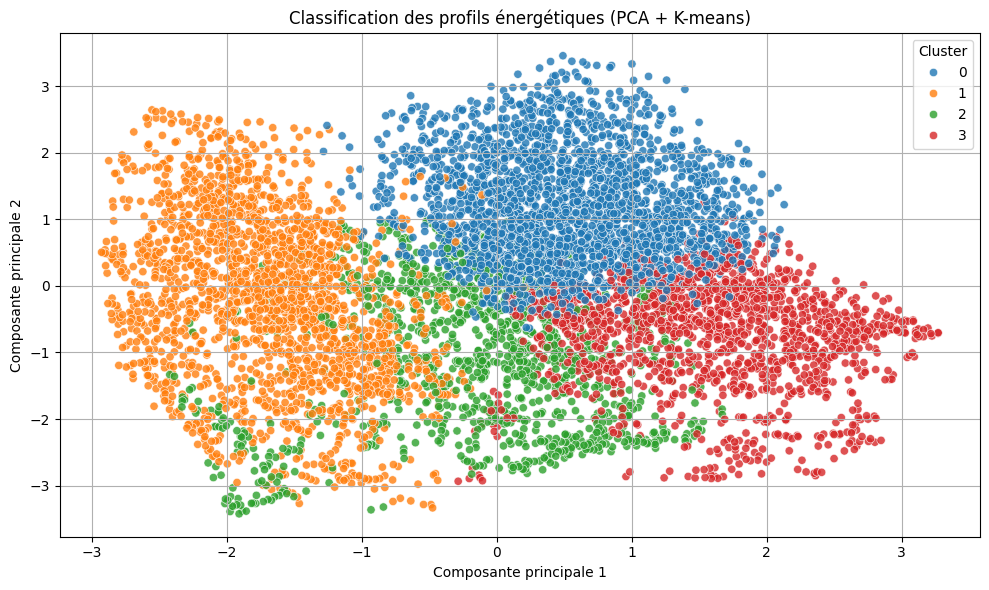

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

features = [
    'electricity_kwh',    # consommation totale
    'occupancy',          # occupation des bâtiments
    'temperature',
    'humidity',
    'hour',
    'dayofweek',
    'working_day',
]

X=df2[features].copy()

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Appliquer K-means avec 4 clusters (modifiable)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les résultats au DataFrame
df2['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', alpha=0.8)
plt.title("Classification des profils énergétiques (PCA + K-means)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_19168\1065664208.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


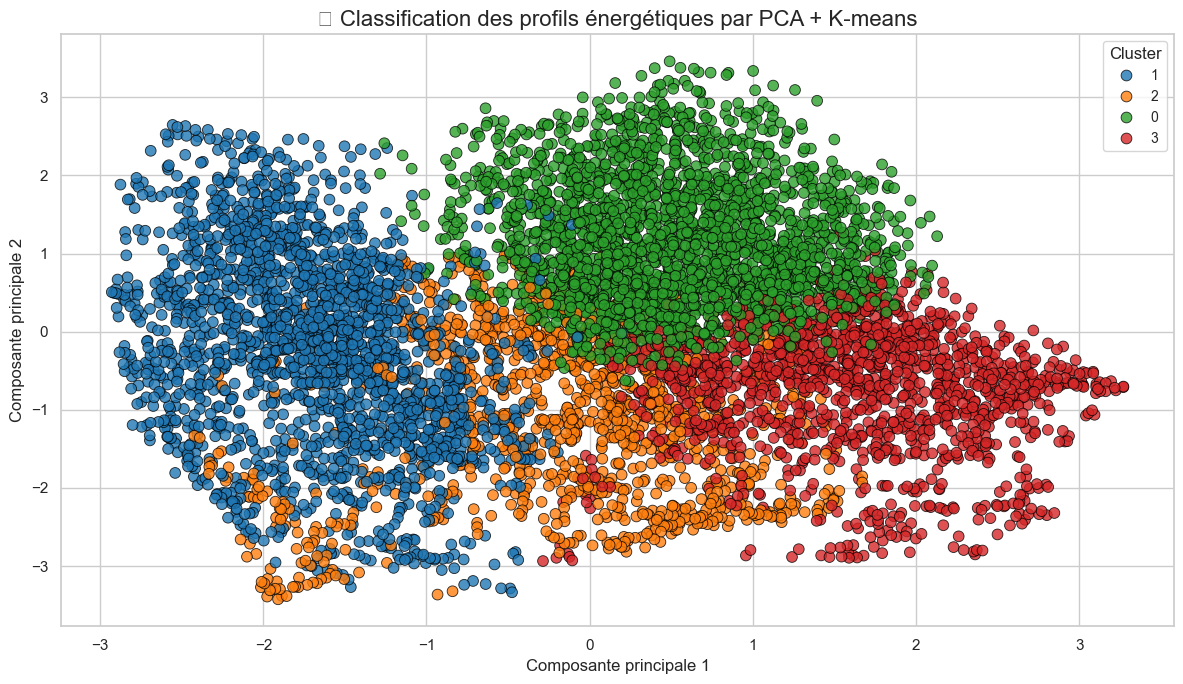

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# On suppose que tu as déjà : X_pca, clusters, df2['cluster']
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df['Cluster'] = df2['cluster'].astype(str)  # Pour légende claire

# Palette de couleurs + styles
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
sns.scatterplot(
    data=pca_df, x="PCA1", y="PCA2",
    hue="Cluster", palette="tab10", s=60, edgecolor="black", alpha=0.8
)

# Titre + axes + légende
plt.title("🔍 Classification des profils énergétiques par PCA + K-means", fontsize=16)
plt.xlabel("Composante principale 1", fontsize=12)
plt.ylabel("Composante principale 2", fontsize=12)
plt.legend(title="Cluster", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


🎨 Points colorés = Clusters (groupes K-means)
Couleur	Cluster	Signification possible (à confirmer avec les moyennes)
🔵 Bleu	Cluster 0	Activité normale (conso + occupation équilibrées)
🟠 Orange	Cluster 1	Faible occupation + faible conso (week-ends, vacances)
🟢 Vert	Cluster 2	Journée froide ou faible conso malgré occupation
🔴 Rouge	Cluster 3	Haute conso potentielle ou surutilisation

